In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
#read the data in a dataframe
df= pd.read_csv(r'C:\Users\dell\Desktop\Autoformation\movies.csv')

In [2]:
#printing the first 5 observations of out data frame
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#let's check if there is any missing data
for col in df.columns:
    pctmissing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pctmissing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [4]:
df= df.dropna()

In [5]:
#let's verify
for col in df.columns:
    pctmissing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pctmissing))

name-0.0%
rating-0.0%
genre-0.0%
year-0.0%
released-0.0%
score-0.0%
votes-0.0%
director-0.0%
writer-0.0%
star-0.0%
country-0.0%
budget-0.0%
gross-0.0%
company-0.0%
runtime-0.0%


In [6]:
# look at data types for each column
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
df['budget'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)
df['budget'] = df['budget'].astype('int64')
df['votes'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)
df['votes'] = df['votes'].astype('int64')
df['gross'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)
df['gross'] = df['gross'].astype('int64')
df['runtime'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)
df['runtime'] = df['runtime'].astype('int64')

In [8]:
#let's verify if changes were applied
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [44]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149


In [10]:
#correct the date of the release of the movie

In [11]:
#by exctracting the year from the total date 
df['yearcorrect'] = df ['released'].astype(str).str[4:]

In [43]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149


In [42]:
# Drop column 'yearcorrect'
df.drop(labels='yearcorrect', axis=1, inplace=True)

# Verify that column 'yearcorrect' has been dropped
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149


In [14]:
#great
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [45]:
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149


In [16]:
#.str.extract(pat = '([0-9]{4})'): This uses the str.extract method, which extracts a regular expression pattern from the
#released column. In this case, the pattern ([0-9]{4}) matches any sequence of four consecutive digits.
#.astype(int): This converts the resulting extracted values from strings to integers.

In [40]:
#let's sort the observations based on the value of the column gross
df = df.sort_values(by='gross', ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,2009
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,2019
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,1997
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,2015
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,2018


In [18]:
pd.set_option('display.max_rows', None)

In [41]:
df = df.sort_values(by='gross', ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,2009
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,2019
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,1997
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,2015
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,2018


In [20]:
#drop any duplicates
#first let's see if there is any duplicates
df['company'].sort_values(ascending =False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
352                                      Zoetrope Studios
146                                      Zoetrope Studios
724                                      Zoetrope Studios
332                                      Zoetrope Studios
2213                                   Zeta Entertainment
5885                              Zentropa Entertainments
3698                              Zentropa Entertainments
4297                              Zentropa Entertainments
4829                              Zentropa Entertainments
5471          

In [21]:
#now lets drop duplicates
df['company'].drop_duplicates().sort_values(ascending =False)
#we only see distinct companies

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

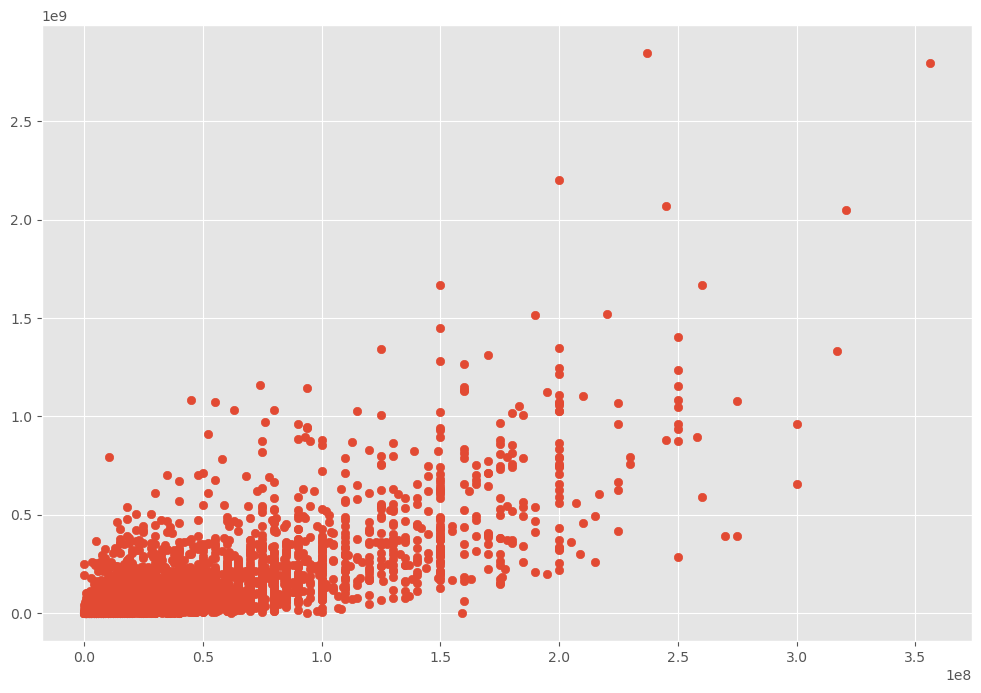

In [22]:
#budget high correlation
#Nothing is better than to start with a scatter plot
plt.scatter(x=df['budget'],y=df['gross'])
plt.show()

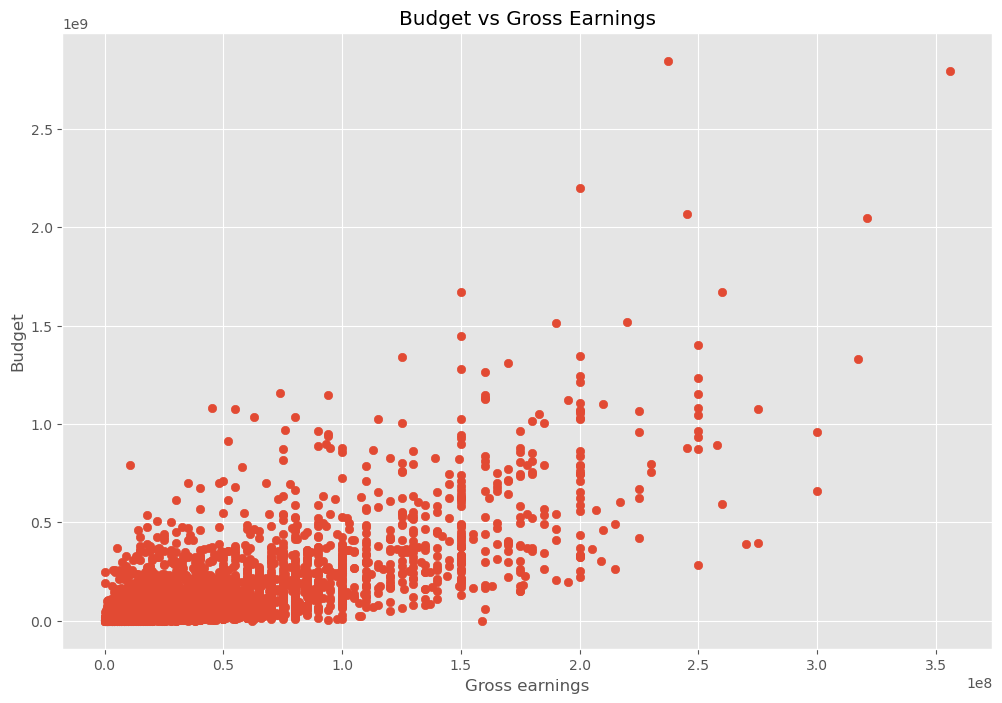

In [23]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.xlabel('Gross earnings')
plt.ylabel('Budget')
plt.title('Budget vs Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

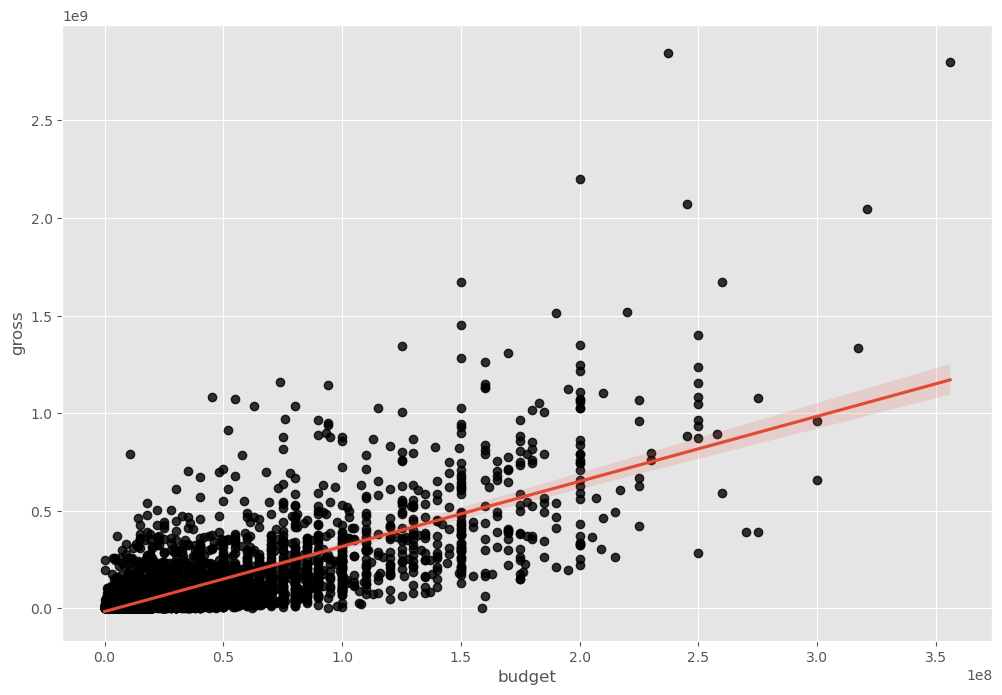

In [25]:
#lets do a reg plot to determin if there is a linear relation between two variables
sns.regplot(x='budget', y = 'gross',data = df,scatter_kws={"color":"black"})

In [26]:
df.corr(method='pearson') #pearson ,  kendall , spearman

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


In [27]:
#High correlation between budget and gross
correlation_matrix= df.corr(method='pearson')

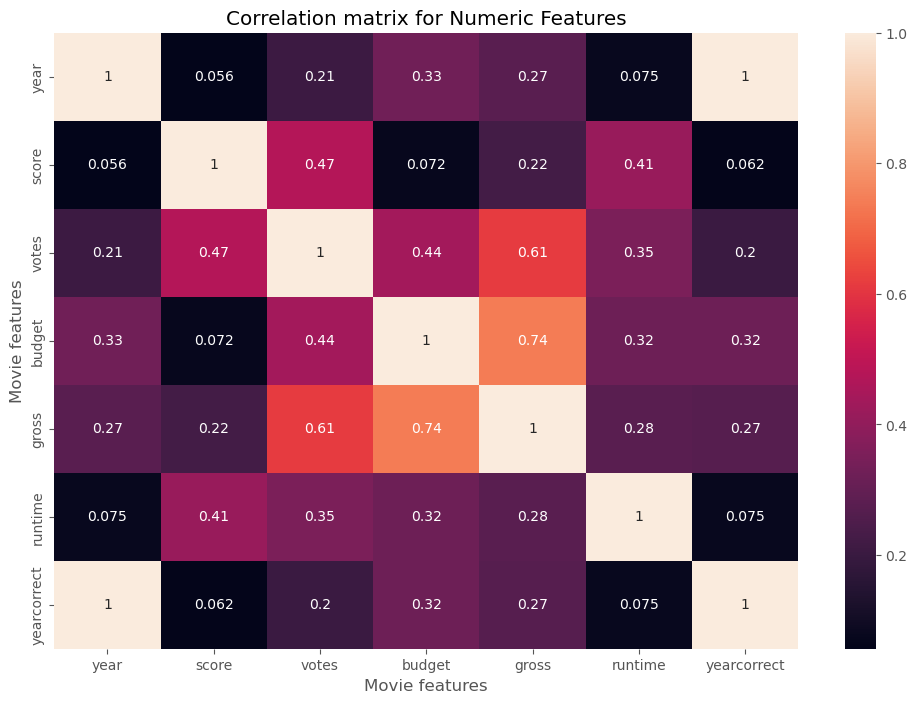

In [29]:
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [30]:
#we will be looking at company
#this column isnt numerical 
new_df= df
for col in new_df :
    if (new_df[col].dtype== 'object' ):
        new_df[col]= new_df[col].astype('category')
        new_df[col] = new_df[col].cat.codes     

In [39]:
new_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,2009
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,2019
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,1997
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,2015
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,2018


In [37]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,2009
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,2019
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,1997
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,2015
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,2018


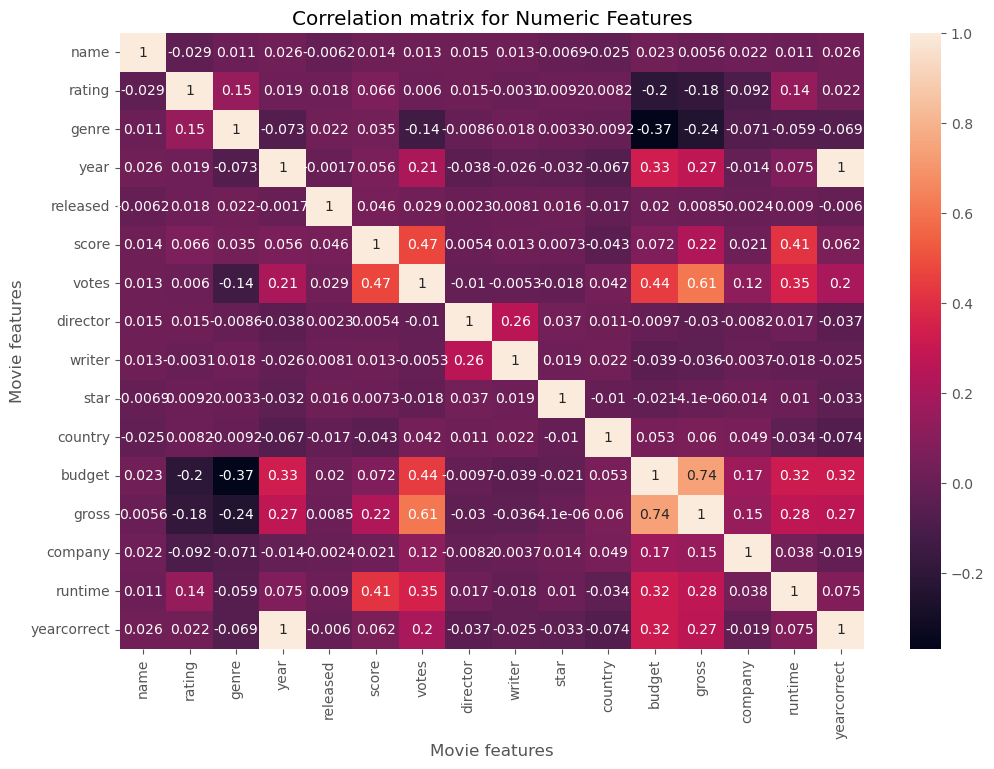

In [38]:
new_correlation_matrix = new_df.corr()
sns.heatmap(new_correlation_matrix, annot=True)
plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [34]:
#let's visualise this in a better way
corr_pairs = new_correlation_matrix.unstack()
corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect    0.025542
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [35]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
rating       gross         -0.181906
gross        rating        -0.181906
votes        genre         -0.135990
genre        votes         -0.135990
company      rating        -0.092357
rating       company       -0.092357
country      yearcorrect   -0.073569
yearcorrect  country       -0.073569
year         genre         -0.073167
genre        year          -0.073167
             company       -0.071334
company      genre         -0.071334
genre        yearcorrect   -0.069147
yearcorrect  genre         -0.069147
year         country       -0.066748
country      year          -0.066748
genre        runtime       -0.059237
runtime      genre         -0.059237
score        country       -0.043051
country      score         -0.043051
writer       budget        -0.039466
b

In [36]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.998726
yearcorrect  year           0.998726
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#logical to have a high correlation between Yearcorrect and year
#did't expect huge correlation betweem votes and gross 